# LSTM model met mempool data (Mepool Size)

In [1]:
# Import data
import pandas as pd

# Read the dataset without mempool data
df = pd.read_csv('C:/Users/boris/Documents/M&T/Financial Innovation/Afstuderen/Scriptie/Feature_engineering/df_geen_mempool.csv')


In [2]:
df= df.drop(columns = 'regime_change')

In [3]:
df

,Timestamp,Open,High,Low,Close,Volume,value,value_classification,daily_std,MA7,MA30,market_regime
0,2018-02-01,9974.91,10187.56,8820.96,8970.00,20517.085284,30.0,Fear,683.300,10602.648571,12637.540000,1
1,2018-02-02,8970.00,9234.10,7625.25,8580.00,47828.982222,15.0,Extreme Fear,804.425,10250.204286,12429.063333,1
2,2018-02-03,8551.19,9443.96,8170.71,9386.72,17968.929040,40.0,Fear,636.625,9956.165714,12249.274000,1
3,2018-02-04,9391.30,9491.20,8189.32,8301.65,14407.720751,24.0,Extreme Fear,650.940,9484.974286,11980.415000,1
4,2018-02-05,8301.65,8416.03,6865.66,6877.61,37314.242065,11.0,Extreme Fear,775.185,8862.992857,11650.574333,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2660,2025-05-15,103514.00,104184.00,101442.00,103793.00,1339.093301,70.0,Greed,1371.000,103740.571429,95361.833333,0
2661,2025-05-16,103800.00,104570.00,103137.00,103506.00,994.760377,71.0,Greed,716.500,103814.142857,96010.500000,0
2662,2025-05-17,103503.00,103720.00,102668.00,103153.00,459.809889,74.0,Greed,526.000,103577.571429,96617.133333,0
2663,2025-05-18,103172.00,106635.00,103149.00,106520.00,905.179396,74.0,Greed,1743.000,103919.142857,97352.200000,0


In [4]:
# Check for missing values in the 'value' column
print("Number of missing values in 'value' column:", df['value'].isna().sum())

# Interpolate missing values in the 'value' column using linear interpolation
df['value'] = df['value'].interpolate(method='linear')

# Verify that all missing values are filled
print("Number of missing values after interpolation:", df['value'].isna().sum())


Number of missing values in 'value' column: 4
Number of missing values after interpolation: 0


### Mempool data toevoegen aan df

In [5]:
# Read mempool data
mempool_df = pd.read_csv('C:/Users/boris/Documents/M&T/Financial Innovation/Afstuderen/Scriptie/Feature_engineering/mempool_data.csv')


In [6]:
mempool_df

,Date,mempool_transaction_count,MempoolSizeBytes,avg_fee_usd
0,2018-02-01,9.784452,17.768706,4.351634
1,2018-02-02,9.764333,17.773003,4.305297
2,2018-02-03,9.743801,17.777281,4.393192
3,2018-02-04,9.394608,17.405676,4.578901
4,2018-02-05,8.853456,16.807729,4.889506
...,...,...,...,...
2651,2025-05-06,8.574361,14.885169,4.619751
2652,2025-05-07,8.498121,15.494085,4.774688
2653,2025-05-08,8.415585,15.869819,4.990036
2654,2025-05-09,8.391017,15.795769,5.078121


In [7]:
# Convert 'Date' column to datetime
mempool_df['Date'] = pd.to_datetime(mempool_df['Date'])

# Rename 'Date' column to 'Timestamp' to match df
mempool_df = mempool_df.rename(columns={'Date': 'Timestamp'})

# Set Timestamp as index to match format with df
mempool_df.set_index('Timestamp', inplace=True)


In [8]:
mempool_df.reset_index()

,Timestamp,mempool_transaction_count,MempoolSizeBytes,avg_fee_usd
0,2018-02-01,9.784452,17.768706,4.351634
1,2018-02-02,9.764333,17.773003,4.305297
2,2018-02-03,9.743801,17.777281,4.393192
3,2018-02-04,9.394608,17.405676,4.578901
4,2018-02-05,8.853456,16.807729,4.889506
...,...,...,...,...
2651,2025-05-06,8.574361,14.885169,4.619751
2652,2025-05-07,8.498121,15.494085,4.774688
2653,2025-05-08,8.415585,15.869819,4.990036
2654,2025-05-09,8.391017,15.795769,5.078121


In [9]:
# Reset index of both dataframes before merging
df = df.reset_index()
mempool_df = mempool_df.reset_index()

# Convert Timestamp columns to datetime type
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
mempool_df['Timestamp'] = pd.to_datetime(mempool_df['Timestamp'])

# Merge df with mempool_df on Timestamp
df = pd.merge(df, mempool_df, on='Timestamp', how='left')

# Set Timestamp back as index
df.set_index('Timestamp', inplace=True)

# Check the merged dataframe
df


,index,Open,High,Low,Close,Volume,value,value_classification,daily_std,MA7,MA30,market_regime,mempool_transaction_count,MempoolSizeBytes,avg_fee_usd
Timestamp,,,,,,,,,,,,,,,
2018-02-01,0,9974.91,10187.56,8820.96,8970.00,20517.085284,30.0,Fear,683.300,10602.648571,12637.540000,1,9.784452,17.768706,4.351634
2018-02-02,1,8970.00,9234.10,7625.25,8580.00,47828.982222,15.0,Extreme Fear,804.425,10250.204286,12429.063333,1,9.764333,17.773003,4.305297
2018-02-03,2,8551.19,9443.96,8170.71,9386.72,17968.929040,40.0,Fear,636.625,9956.165714,12249.274000,1,9.743801,17.777281,4.393192
2018-02-04,3,9391.30,9491.20,8189.32,8301.65,14407.720751,24.0,Extreme Fear,650.940,9484.974286,11980.415000,1,9.394608,17.405676,4.578901
2018-02-05,4,8301.65,8416.03,6865.66,6877.61,37314.242065,11.0,Extreme Fear,775.185,8862.992857,11650.574333,1,8.853456,16.807729,4.889506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-15,2660,103514.00,104184.00,101442.00,103793.00,1339.093301,70.0,Greed,1371.000,103740.571429,95361.833333,0,NaN,NaN,NaN
2025-05-16,2661,103800.00,104570.00,103137.00,103506.00,994.760377,71.0,Greed,716.500,103814.142857,96010.500000,0,NaN,NaN,NaN
2025-05-17,2662,103503.00,103720.00,102668.00,103153.00,459.809889,74.0,Greed,526.000,103577.571429,96617.133333,0,NaN,NaN,NaN


In [10]:
# Save the dataframe with all features to CSV
df.to_csv('df_alle_features.csv')


In [11]:
# Keep only rows where data is available for all columns (drop rows with any NaN values)
df = df.dropna(how='any')

In [12]:
# Get first and last date from the DataFrame
first_date = df.index[0]
last_date = df.index[-1]

print(f"First date in dataset: {first_date}")
print(f"Last date in dataset: {last_date}")


First date in dataset: 2018-02-01 00:00:00
Last date in dataset: 2025-05-10 00:00:00


In [13]:
# pip install tensorflow


In [14]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM


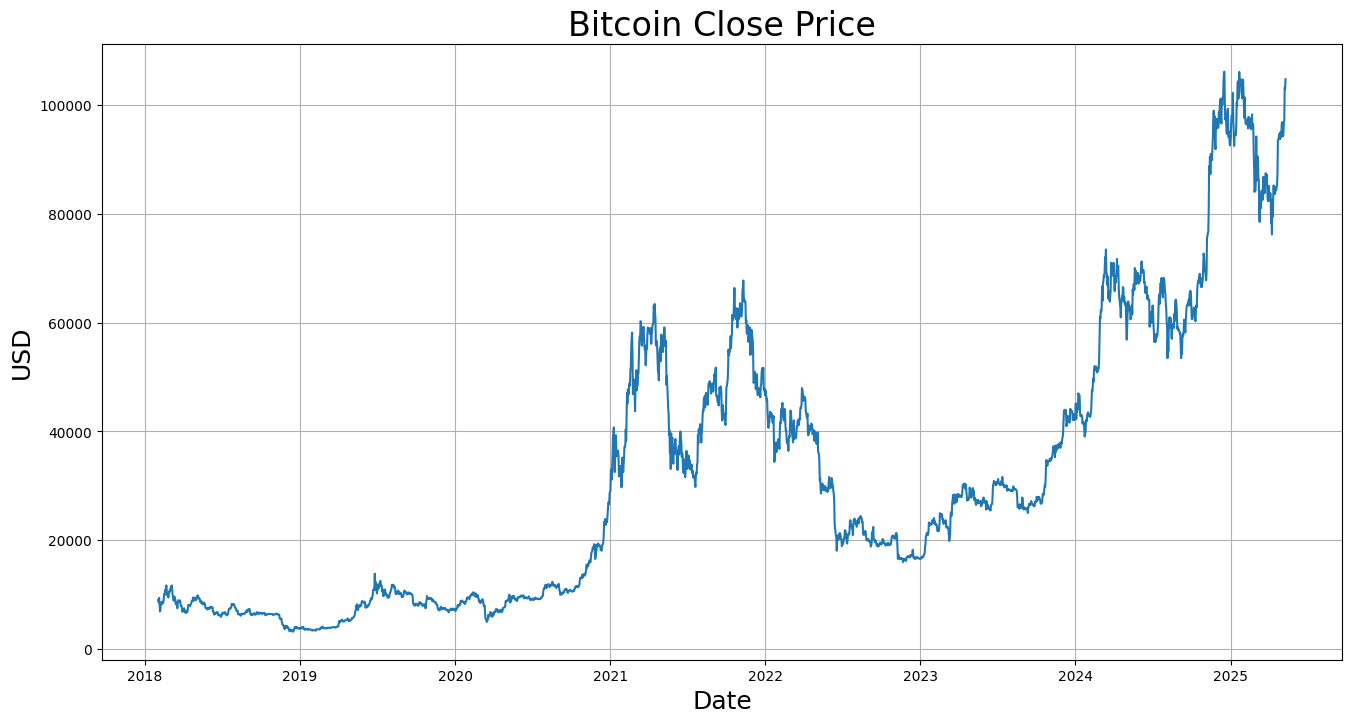

In [15]:
plt.figure(figsize=(16, 8))
plt.title('Bitcoin Close Price', fontsize=24)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('USD', fontsize=18)
plt.grid(True)
plt.show()


# mempool size toevoegen aan de features 

In [16]:
# Voeg features toe aan feature lijst (of juiste naam in jouw dataframe)
feature_columns = ['Close', 'Volume', 'value', 'daily_std', 
                  'MA7', 'MA30', 'market_regime', 'MempoolSizeBytes']

# Maak features en target sets
features = df[feature_columns].values  # numpy array van alle features
target = df[['Close']].values  # Doel is nog steeds de Close prijs

# Train-val-test splits indices zoals eerder
train_size = int(len(df) * 0.7)
val_size = int(len(df) * 0.15) 
test_size = len(df) - train_size - val_size

train_end = train_size
val_end = train_size + val_size

In [17]:
# Splits features en target in train, val, test
train_features = features[:train_end]
val_features = features[train_end:val_end]
test_features = features[val_end:]

train_target = target[:train_end]
val_target = target[train_end:val_end]
test_target = target[val_end:]

In [18]:
# Normaliseer ALLE features op basis van training set
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_features)
val_scaled = scaler.transform(val_features)
test_scaled = scaler.transform(test_features)

In [19]:
# Target schaal apart houden en fitten op train target
target_scaler = MinMaxScaler(feature_range=(0,1))
train_target_scaled = target_scaler.fit_transform(train_target)
val_target_scaled = target_scaler.transform(val_target)
test_target_scaled = target_scaler.transform(test_target)

In [20]:
# Sequenties maken (nu voor alle features)
def create_sequences(features, target, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(features)):
        X.append(features[i-seq_length:i])  # alle features in sequentie
        y.append(target[i])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_scaled, train_target_scaled)
X_val, y_val = create_sequences(val_scaled, val_target_scaled)
X_test, y_test = create_sequences(test_scaled, test_target_scaled)

# Check shapes
print("X_train shape:", X_train.shape)  # moet (samples, 60, 2) zijn
print("y_train shape:", y_train.shape)

X_train shape: (1796, 60, 8)
y_train shape: (1796, 1)


# Model architectuur opzetten (zelfde als baseline model)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Zet de random seed voor reproduceerbaarheid
tf.random.set_seed(42)

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # 2 features
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))  # Voorspelling van 1 waarde: Close prijs

model.compile(optimizer='adam', loss='mean_squared_error')


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Iteratie 1:

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping om overfitting te voorkomen
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Train het model
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]
)


Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - loss: 0.0222 - val_loss: 0.0054
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.0014 - val_loss: 0.0026
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0011 - val_loss: 0.0024
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0010 - val_loss: 0.0020
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 9.5466e-04 - val_loss: 0.0019
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 9.1892e-04 - val_loss: 0.0018
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 8.8172e-04 - val_loss: 0.0018
Epoch 9/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 8.4638e-04 - val_loss: 0.0017
Epoch 10/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 8.1486e-04 - val_loss: 0.0016
Epoch 11/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 7.8660e-04 - val_loss: 0.0015
Epoch 12/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 

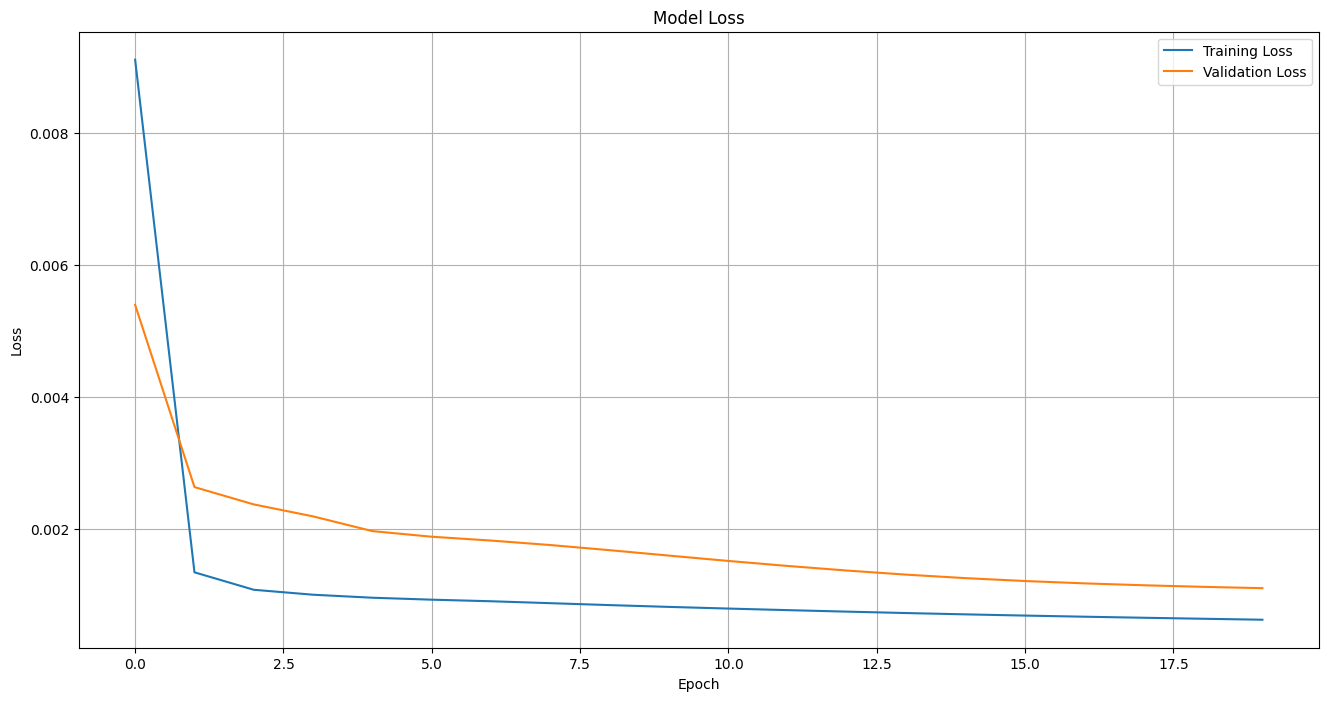

In [23]:
# Plot training and validation loss
plt.figure(figsize=(16, 8))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
# Make predictions on validation set
val_predictions = model.predict(X_val)

# Calculate RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
print(f"Validation RMSE: {val_rmse}")

# Since the data was scaled, we should also show the unscaled RMSE
unscaled_val_rmse = val_rmse * (target_scaler.data_max_ - target_scaler.data_min_)
print(f"Unscaled Validation RMSE: {unscaled_val_rmse}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
Validation RMSE: 0.03323446521858815
Unscaled Validation RMSE: [2147.64171813]


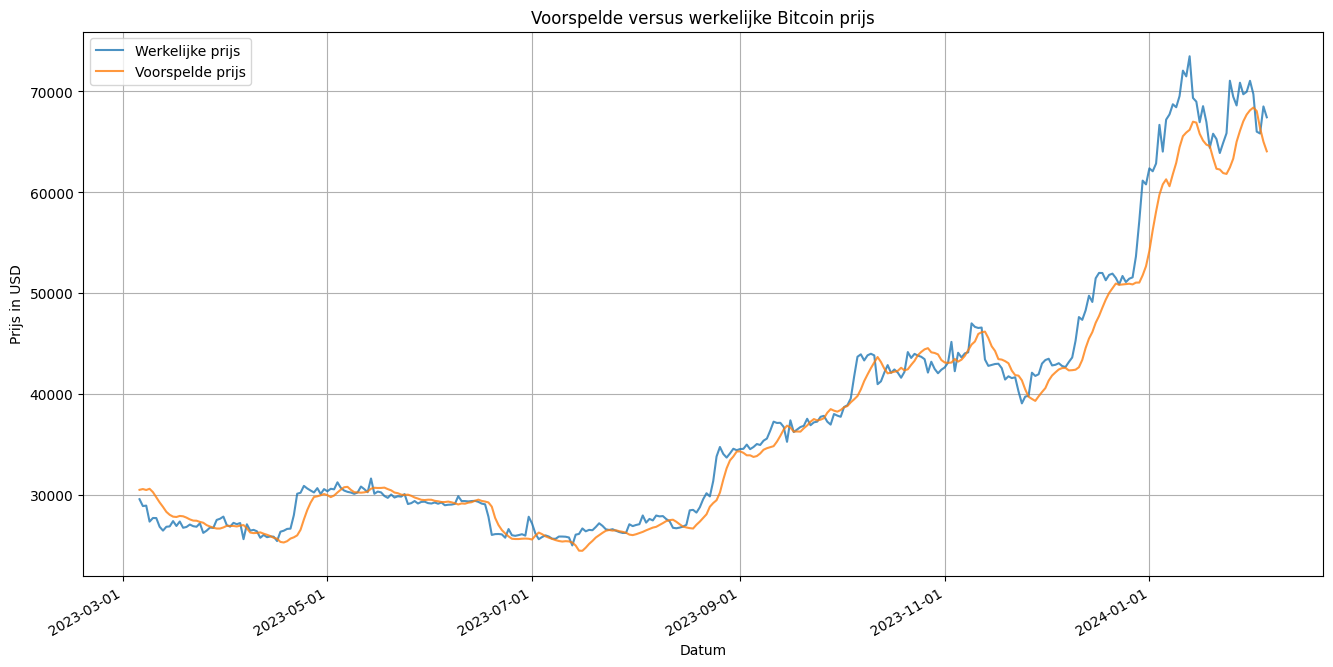

In [25]:
# For better date visualization, we can use the actual dates
# First define training size and sequence length
training_size = len(X_train)
sequence_length = X_train.shape[1]  # Get sequence length from training data shape

# Get the dates corresponding to validation set
val_dates = df.index[training_size+sequence_length:training_size+len(y_val)+sequence_length]

# Show the unscaled version
unscaled_y_val = target_scaler.inverse_transform(y_val.reshape(-1, 1))
unscaled_predictions = target_scaler.inverse_transform(val_predictions)

plt.figure(figsize=(16, 8))
plt.plot(val_dates, unscaled_y_val, label='Werkelijke prijs', alpha=0.8)
plt.plot(val_dates, unscaled_predictions, label='Voorspelde prijs', alpha=0.8)
plt.title('Voorspelde versus werkelijke Bitcoin prijs')
plt.xlabel('Datum')
plt.ylabel('Prijs in USD')
plt.legend()
plt.grid(True)

# Format x-axis to show dates properly
plt.gcf().autofmt_xdate()  # Rotate and align the tick labels
from matplotlib.dates import DateFormatter
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.show()


In [26]:
# Make predictions on validation set
val_predictions = model.predict(X_val)

# Calculate RMSE on unscaled predictions
val_rmse = np.sqrt(mean_squared_error(
    target_scaler.inverse_transform(y_val.reshape(-1, 1)),
    target_scaler.inverse_transform(val_predictions)
))

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((target_scaler.inverse_transform(y_val.reshape(-1, 1)) - 
                       target_scaler.inverse_transform(val_predictions)) / 
                       target_scaler.inverse_transform(y_val.reshape(-1, 1)))) * 100

print(f'Validation RMSE: ${val_rmse:,.2f}')
print(f'Validation MAPE: {mape:.2f}%')


 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Validation RMSE: $2,147.64
Validation MAPE: 3.32%


# Ieteratie 2: Even kijken wat er gebeurd als ik alleen het aantal neurone verhoog (test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Exacte modelstructuur van Iteratie 1
model_it_1_repeat = Sequential()
model_it_1_repeat.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_it_1_repeat.add(LSTM(100, return_sequences=False))
model_it_1_repeat.add(Dense(25))
model_it_1_repeat.add(Dense(1))

# Zelfde optimizer en loss
model_it_1_repeat.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping als veiligheid (optioneel, verhoogd naar patience=10)
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Train het model
history_it_1_repeat = model_it_1_repeat.fit(
    X_train, y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]
)


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - loss: 0.0248 - val_loss: 0.0071
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0016 - val_loss: 0.0028
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0011 - val_loss: 0.0025
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0010 - val_loss: 0.0023
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 9.6791e-04 - val_loss: 0.0022
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 9.2523e-04 - val_loss: 0.0021
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 8.8524e-04 - val_loss: 0.0020
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 8.4989e-04 - val_loss: 0.0019
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 8.1881e-04 - val_loss: 0.0018
Epoch 11/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 7.9092e-04 - val_loss: 0.0017
Epoch 12/100
57/57 ━━━━━━━━━

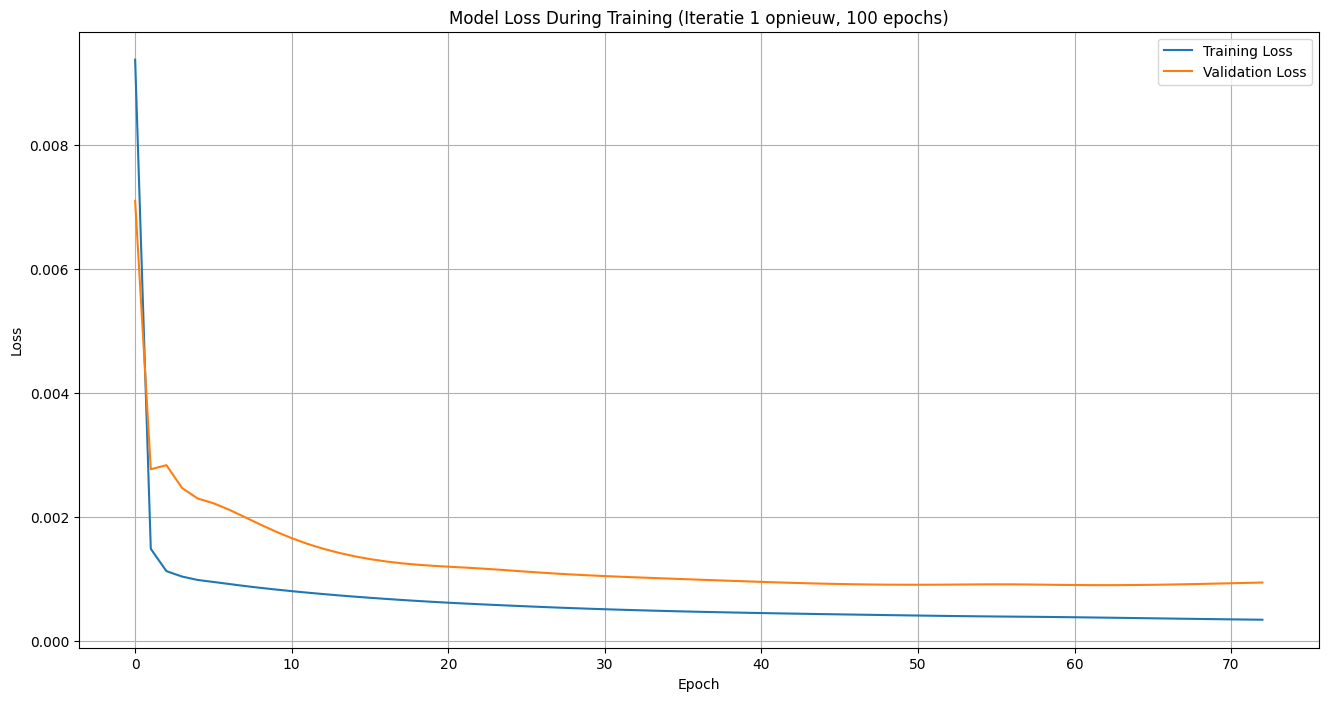

In [41]:
plt.figure(figsize=(16, 8))
plt.plot(history_it_1_repeat.history['loss'], label='Training Loss')
plt.plot(history_it_1_repeat.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training (Iteratie 1 opnieuw, 100 epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
# Make predictions on validation set
val_predictions = model_it_1_repeat.predict(X_val)

# Calculate RMSE on unscaled predictions
val_rmse = np.sqrt(mean_squared_error(
    target_scaler.inverse_transform(y_val.reshape(-1, 1)),
    target_scaler.inverse_transform(val_predictions)
))

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((target_scaler.inverse_transform(y_val.reshape(-1, 1)) - 
                       target_scaler.inverse_transform(val_predictions)) / 
                       target_scaler.inverse_transform(y_val.reshape(-1, 1)))) * 100

print(f'Validation RMSE: ${val_rmse:,.2f}')
print(f'Validation MAPE: {mape:.2f}%')


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
Validation RMSE: $1,985.64
Validation MAPE: 3.57%


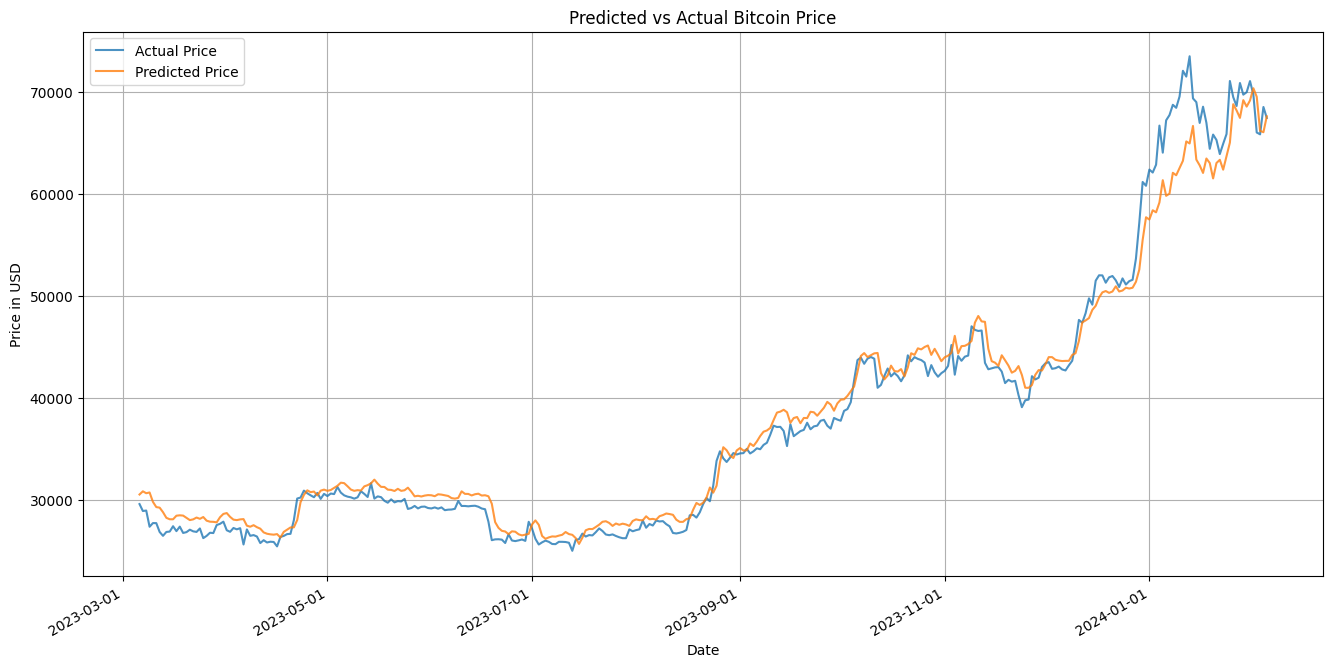

In [43]:
# For better date visualization, we can use the actual dates
training_size = len(X_train)
sequence_length = X_train.shape[1]  # Get sequence length from training data shape

# Get the dates corresponding to validation set
val_dates = df.index[training_size+sequence_length:training_size+len(y_val)+sequence_length]

# Show the unscaled version
unscaled_y_val = target_scaler.inverse_transform(y_val.reshape(-1, 1))
unscaled_predictions = target_scaler.inverse_transform(val_predictions)

plt.figure(figsize=(16, 8))
plt.plot(val_dates, unscaled_y_val, label='Actual Price', alpha=0.8)
plt.plot(val_dates, unscaled_predictions, label='Predicted Price', alpha=0.8)
plt.title('Predicted vs Actual Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)

# Format x-axis to show dates properly
plt.gcf().autofmt_xdate()  # Rotate and align the tick labels
from matplotlib.dates import DateFormatter
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.show()


In [44]:
# Calculate RMSE on unscaled predictions
val_rmse = np.sqrt(mean_squared_error(
    target_scaler.inverse_transform(y_val.reshape(-1, 1)),
    target_scaler.inverse_transform(val_predictions)
))

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((target_scaler.inverse_transform(y_val.reshape(-1, 1)) - 
                       target_scaler.inverse_transform(val_predictions)) / 
                       target_scaler.inverse_transform(y_val.reshape(-1, 1)))) * 100

print(f'Validation RMSE: ${val_rmse:,.2f}')
print(f'Validation MAPE: {mape:.2f}%')


Validation RMSE: $1,985.64
Validation MAPE: 3.57%


# Grid Search voor het vinden van de beste hyperparameters

Ik heb hier verschillende grid search iteraties gedaan, waar ik ook 64 wilde proberen omdat uit die vorige 50 kwam kijk ik of een leanring rate van 0.005 beter werkt dan de beste waarde uit vogie grid search van 0.001 (tussen 0.001 en 001)

In [42]:
# import itertools
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.metrics import mean_squared_error

# # Define parametergrid
# param_grid = {
#     'units_per_layer': [[25,50], [50,64], [150,150], [25,64], [64,150]], #Units
#     'num_layers': [1, 2, 3],
#     'return_sequences': [[True], [True, False], [True, True, False]],  # afgestemd op num_layers
#     'dropout': [0.0, 0.2, 0.3],
#     'recurrent_dropout': [0.0, 0.2, 0.3],
#     'batch_size': [16, 32, 64],
#     'learning_rate': [0.01, 0.005, 0.001],
#     'epochs': [100]
# }

# # Combinaties zonder return_sequences
# base_keys = ['units_per_layer', 'num_layers', 'dropout', 'recurrent_dropout', 'batch_size', 'learning_rate', 'epochs']
# base_values = [param_grid[k] for k in base_keys]
# base_combinations = list(itertools.product(*base_values))

# results = []

# for base in base_combinations:
#     base_config = dict(zip(base_keys, base))

#     # Selecteer juiste return_sequences patroon op basis van aantal lagen
#     if base_config['num_layers'] == 1:
#         return_seq_options = [[True]]
#     elif base_config['num_layers'] == 2:
#         return_seq_options = [[True, False]]
#     else:
#         return_seq_options = [[True, True, False]]

#     for rs in return_seq_options:
#         config = base_config.copy()
#         config['return_sequences'] = rs

#         tf.keras.backend.clear_session()
#         model = Sequential()

#         for i in range(config['num_layers']):
#             return_seq = config['return_sequences'][i]
#             units = base_config['units_per_layer'][i]

#             if i == 0:
#                 model.add(LSTM(
#                     units=units,
#                     return_sequences=return_seq,
#                     dropout=config['dropout'],
#                     recurrent_dropout=config['recurrent_dropout'],
#                     input_shape=(X_train.shape[1], X_train.shape[2])
#                 ))
#             else:
#                 model.add(LSTM(
#                     units=units,
#                     return_sequences=return_seq,
#                     dropout=config['dropout'],
#                     recurrent_dropout=config['recurrent_dropout']
#                 ))

#         model.add(Dense(25))
#         model.add(Dense(1))

#         model.compile(optimizer=Adam(learning_rate=config['learning_rate']), loss='mean_squared_error')

#         early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#         history = model.fit(
#             X_train, y_train,
#             validation_data=(X_val, y_val),
#             epochs=config['epochs'],
#             batch_size=config['batch_size'],
#             callbacks=[early_stop],
#             verbose=0
#         )

#         val_pred = model.predict(X_val, verbose=0)
#         rmse = np.sqrt(mean_squared_error(y_val, val_pred))

#         results.append({
#             **config,
#             'val_rmse': rmse
#         })

# # Beste config selecteren
# best_config = min(results, key=lambda x: x['val_rmse'])

# # Print resultaten
# print("\nBeste hyperparameters gevonden na grid search:")
# print("------------------------------------------------")
# print(f"Number of units (per layer): {best_config['units_per_layer']}")  
# print(f"Number of layers: {best_config['num_layers']}")
# print(f"Return sequences: {best_config['return_sequences']}")
# print(f"Dropout: {best_config['dropout']}")
# print(f"Recurrent Dropout: {best_config['recurrent_dropout']}")
# print(f"Batch size: {best_config['batch_size']}")
# print(f"Learning rate: {best_config['learning_rate']}")
# print(f"Number of epochs: {best_config['epochs']} (early stopping was actief)")

# Trainen met beste parameters uit gridsearch

In [52]:
# Create a new variant of the model with a different name
model_variant_3 = Sequential()
model_variant_3.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_variant_3.add(LSTM(150, return_sequences=False))
model_variant_3.add(Dense(25))
model_variant_3.add(Dense(1))

# Compile with lower learning rate
model_variant_3.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

# Early stopping callback
early_stop_v3 = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history_variant_3 = model_variant_3.fit(
    X_train, y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[early_stop_v3]
)


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - loss: 0.0208 - val_loss: 0.0031
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0013 - val_loss: 0.0033
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 0.0011 - val_loss: 0.0023
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 0.0010 - val_loss: 0.0021
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - loss: 9.7319e-04 - val_loss: 0.0020
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 9.1540e-04 - val_loss: 0.0019
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 8.6688e-04 - val_loss: 0.0018
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 8.2695e-04 - val_loss: 0.0017
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 7.9430e-04 - val_loss: 0.0016
Epoch 11/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 7.6683e-04 - val_loss: 0.0016
Epoch 12/100
57/57 ━━━━━

In [54]:
# Calculate RMSE on unscaled predictions for validation set variant 3
val_predictions_v3 = model_variant_3.predict(X_val)

val_rmse_v3 = np.sqrt(mean_squared_error(
    target_scaler.inverse_transform(y_val.reshape(-1, 1)),
    target_scaler.inverse_transform(val_predictions_v3)
))

# Calculate MAPE for validation set variant 3
val_mape_v3 = np.mean(np.abs((target_scaler.inverse_transform(y_val.reshape(-1, 1)) - 
                     target_scaler.inverse_transform(val_predictions_v3)) / 
                     target_scaler.inverse_transform(y_val.reshape(-1, 1)))) * 100

print(f'Validation RMSE Variant 3: ${val_rmse_v3:,.2f}')
print(f'Validation MAPE Variant 3: {val_mape_v3:.2f}%')


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Validation RMSE Variant 3: $1,546.47
Validation MAPE Variant 3: 2.80%


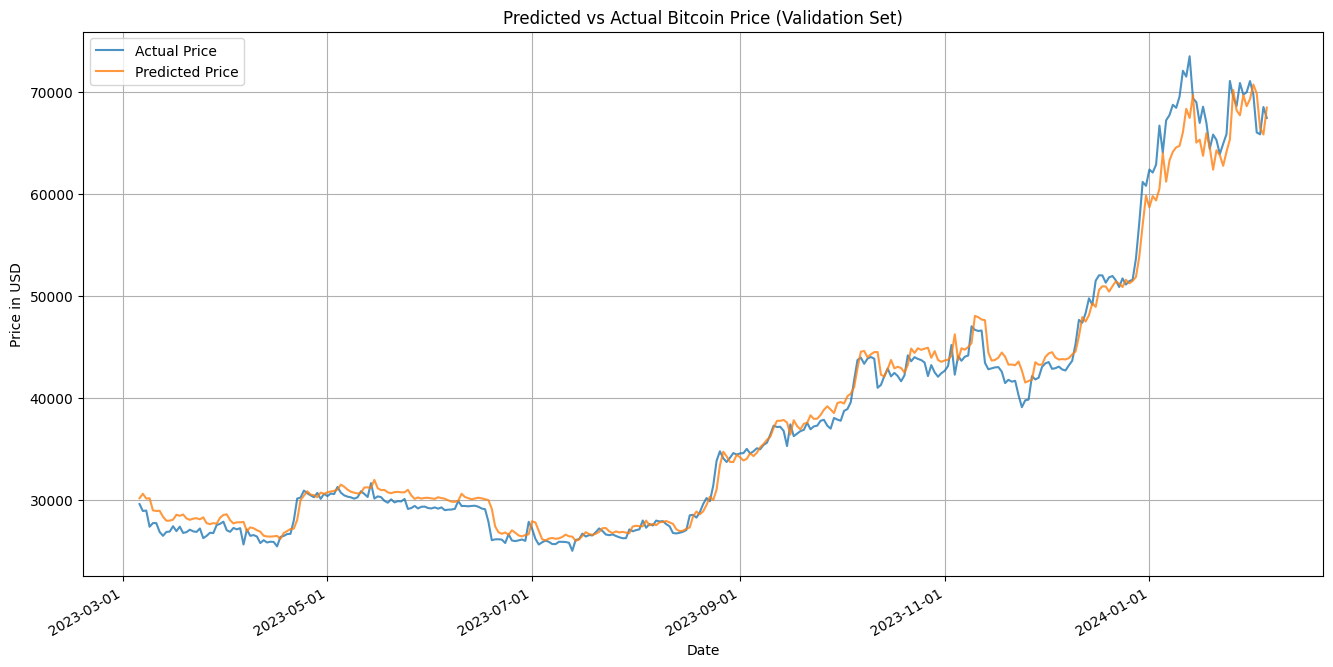

In [55]:
# Get the dates corresponding to validation set
val_dates = df.index[training_size+sequence_length:training_size+len(y_val)+sequence_length]

# Show the unscaled version
unscaled_y_val = target_scaler.inverse_transform(y_val.reshape(-1, 1))
unscaled_val_predictions = target_scaler.inverse_transform(val_predictions_v3)

plt.figure(figsize=(16, 8))
plt.plot(val_dates, unscaled_y_val, label='Actual Price', alpha=0.8)
plt.plot(val_dates, unscaled_val_predictions, label='Predicted Price', alpha=0.8)
plt.title('Predicted vs Actual Bitcoin Price (Validation Set)')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)

# Format x-axis to show dates properly
plt.gcf().autofmt_xdate()  # Rotate and align the tick labels
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.show()


# Resultaten testset berekenen

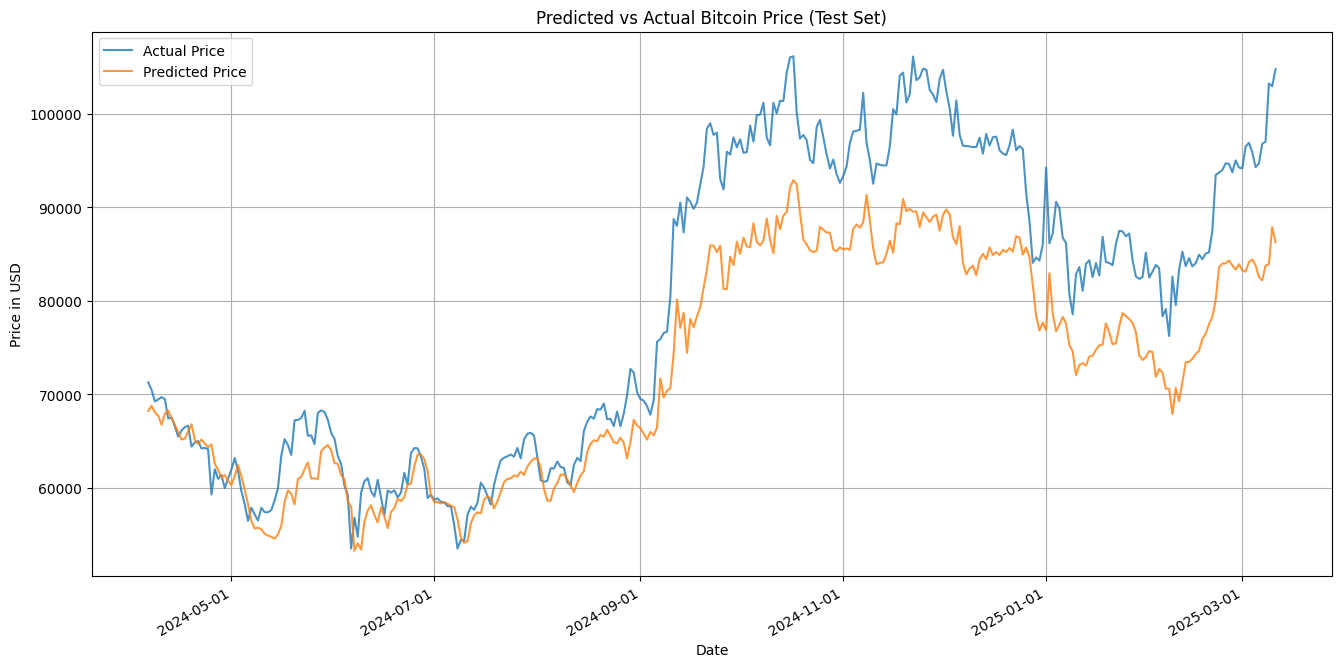

In [56]:
# Get the dates corresponding to test set
test_dates = df.index[training_size+val_size+sequence_length:training_size+val_size+len(y_test)+sequence_length]

# Show the unscaled version
unscaled_y_test = target_scaler.inverse_transform(y_test.reshape(-1, 1))
unscaled_test_predictions = target_scaler.inverse_transform(test_predictions_v3)

plt.figure(figsize=(16, 8))
plt.plot(test_dates, unscaled_y_test, label='Actual Price', alpha=0.8)
plt.plot(test_dates, unscaled_test_predictions, label='Predicted Price', alpha=0.8)
plt.title('Predicted vs Actual Bitcoin Price (Test Set)')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)

# Format x-axis to show dates properly
plt.gcf().autofmt_xdate()  # Rotate and align the tick labels
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.show()


In [53]:
# Make predictions for variant 3
test_predictions_v3 = model_variant_3.predict(X_test)

# Calculate RMSE on unscaled predictions for variant 3
test_rmse_v3 = np.sqrt(mean_squared_error(
    target_scaler.inverse_transform(y_test.reshape(-1, 1)),
    target_scaler.inverse_transform(test_predictions_v3)
))

# Calculate MAPE for variant 3
test_mape_v3 = np.mean(np.abs((target_scaler.inverse_transform(y_test.reshape(-1, 1)) - 
                       target_scaler.inverse_transform(test_predictions_v3)) / 
                       target_scaler.inverse_transform(y_test.reshape(-1, 1)))) * 100

print(f'Test RMSE Variant 3: ${test_rmse_v3:,.2f}')
print(f'Test MAPE Variant 3: {test_mape_v3:.2f}%')


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step
Test RMSE Variant 3: $8,572.98
Test MAPE Variant 3: 7.99%


# Vegrelijking Model met baseline model: 

### Vergelijking testset prediction

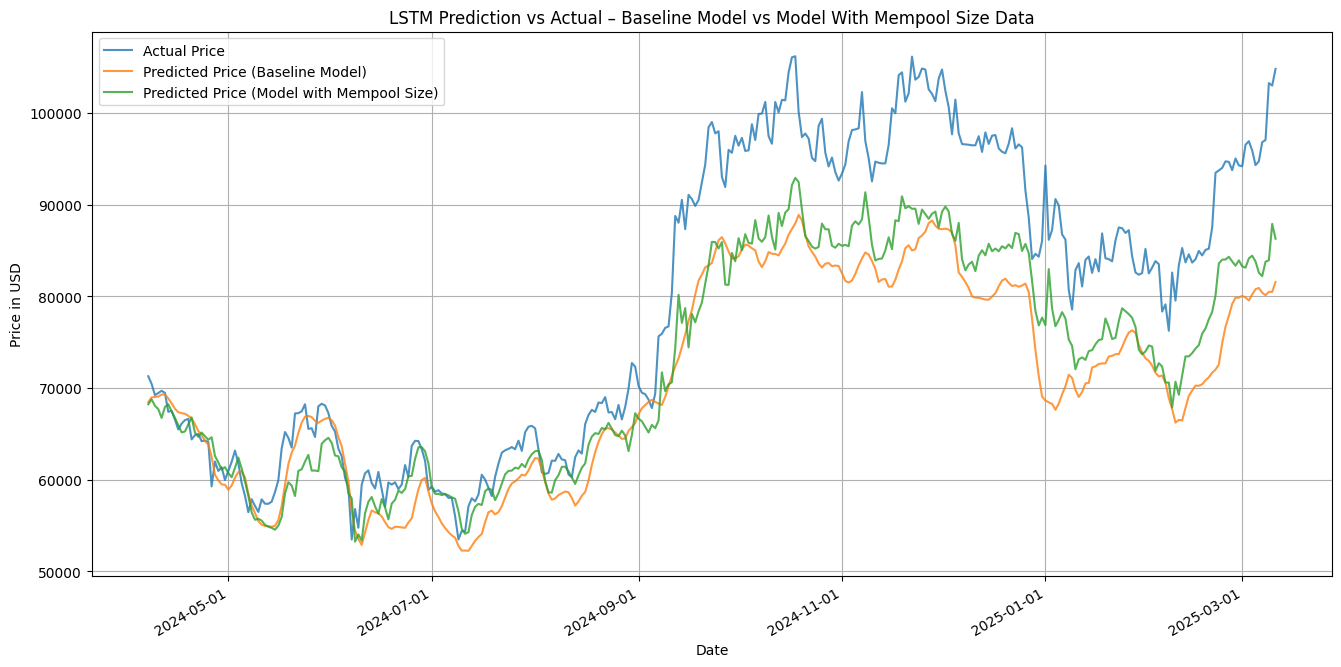

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Geef het volledige pad op (gebruik raw string of dubbele backslashes)
file_path = r'C:\Users\boris\Documents\M&T\Financial Innovation\Afstuderen\Scriptie\LSTM_Model\saved_models\lstm_baseline_results_rmse_11037.22_mape_10.49.csv'

# Lees het CSV-bestand in, en parse de datumkolom
df = pd.read_csv(file_path, parse_dates=['Date'])

# Get dates from test set
test_dates = df['Date']

# Get actual and predicted values from variant 3
actual_prices = target_scaler.inverse_transform(y_test.reshape(-1, 1))
predicted_prices_v3 = target_scaler.inverse_transform(test_predictions_v3)

# Plotten van de daadwerkelijke en voorspelde prijzen
plt.figure(figsize=(16, 8))
plt.plot(test_dates, actual_prices, label='Actual Price', alpha=0.8)
plt.plot(test_dates, df['Predicted_Price'], label='Predicted Price (Baseline Model)', alpha=0.8)
plt.plot(test_dates, predicted_prices_v3, label='Predicted Price (Model with Mempool Size)', alpha=0.8)

plt.title('LSTM Prediction vs Actual – Baseline Model vs Model With Mempool Size Data')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)

# Nettere datumnotatie
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.show()
